In [1]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

pd.options.display.max_columns = 40

## Hack for Heat #2: Problem types over time

In this post, I'm going to explore how we might track the composition of problems that the [HPD](http://www1.nyc.gov/site/hpd/index.page)(Housing Preservation and Development Board) might receive over time. The data that I currently have are only limited to 2.5 years, so this is just a proof of concept.

In [2]:
hpdcompprob = pd.read_csv("Complaint_Problems.csv")

In [3]:
type(hpdcompprob.StatusDate[0])

str

The first thing we're going to do is convert string dates into simple years, months, and days.

In [6]:
def extract_dates(series, nameofdatecolumn):
    series['Year'] = series[nameofdatecolumn].str.extract(r'../../(.*)', expand=True)
    series['Month'] = series[nameofdatecolumn].str.extract(r'(.*)/../....', expand=True)
    series['Day'] = series[nameofdatecolumn].str.extract(r'../(.*)/....', expand=True)
    
extract_dates(hpdcompprob, 'StatusDate')

In [7]:
def count_problem_types(pdseries):
    problemtypes = pdseries.unique()
    problemcounts = {k:0 for k in problemtypes}
    problemcounts['TOTAL'] = 0
    
    for problem in pdseries:
        problemcounts[problem] += 1
    
    problemcounts['TOTAL'] = len(pdseries)
    print year, problemcounts #this is just to show us what those counts are
        
    return problemcounts

In [8]:
#years = hpdcompprob.Year.unique()
years = ['2014','2015','2016'] #We know that only these data are relevant (the other, older years, are remnants of old cases)
yearsdict = {k:{} for k in years}
for year in years:
    yearsdict[year] = count_problem_types(hpdcompprob.loc[hpdcompprob.Year == year].MajorCategory)

2014 {'TOTAL': 259437, 'ELECTRIC': 12684, 'HEAT/HOT WATER': 93548, 'WATER LEAK': 14315, 'APPLIANCE': 5231, 'DOOR/WINDOW': 16352, 'HEATING': 16, 'ELEVATOR': 363, 'GENERAL': 9680, 'FLOORING/STAIRS': 11768, 'NONCONST': 185, 'UNSANITARY CONDITION': 34779, 'SAFETY': 5521, 'PLUMBING': 23179, 'CONSTRUCTION': 3, 'OUTSIDE BUILDING': 758, 'PAINT/PLASTER': 31055}
2015 {'TOTAL': 705644, 'PAINT/PLASTER': 84062, 'WATER LEAK': 42512, 'DOOR/WINDOW': 49154, 'APPLIANCE': 14719, 'NONCONST': 69, 'ELEVATOR': 1213, 'GENERAL': 31482, 'HEAT/HOT WATER': 228157, 'FLOORING/STAIRS': 34741, 'UNSANITARY CONDITION': 97221, 'SAFETY': 17105, 'PLUMBING': 67472, 'CONSTRUCTION': 1, 'OUTSIDE BUILDING': 2183, 'ELECTRIC': 35553}
2016 {'TOTAL': 211830, 'ELECTRIC': 9239, 'WATER LEAK': 12063, 'DOOR/WINDOW': 15465, 'APPLIANCE': 4644, 'HEATING': 39, 'ELEVATOR': 377, 'GENERAL': 9738, 'HEAT/HOT WATER': 73803, 'NONCONST': 33, 'UNSANITARY CONDITION': 27727, 'SAFETY': 5243, 'PLUMBING': 20218, 'FLOORING/STAIRS': 9989, 'OUTSIDE BUILDIN

## Graphing our results

We're going to use matplotlib to make a stacked area graph. I referenced [this](http://matplotlib.org/examples/pylab_examples/stackplot_demo.html) post.

First, let's arrange our dictionary keys in alphabetical order, so that we can extract the values in a meaningful way.

In [9]:
labels = sorted(yearsdict['2014'].keys())
labels.remove('CONSTRUCTION')
labels.remove('HEATING') #removed these because 2015 doesn't have an entry, and both the other years have negligible entries
labels.remove('TOTAL') #not interested in total in this plot

In [10]:
years = ['2014','2015','2016']
plotdict = {k:[] for k in years}
for year in years:
    for label in labels:
        plotdict[year].append(yearsdict[year][label])

In [11]:
len(labels)

14

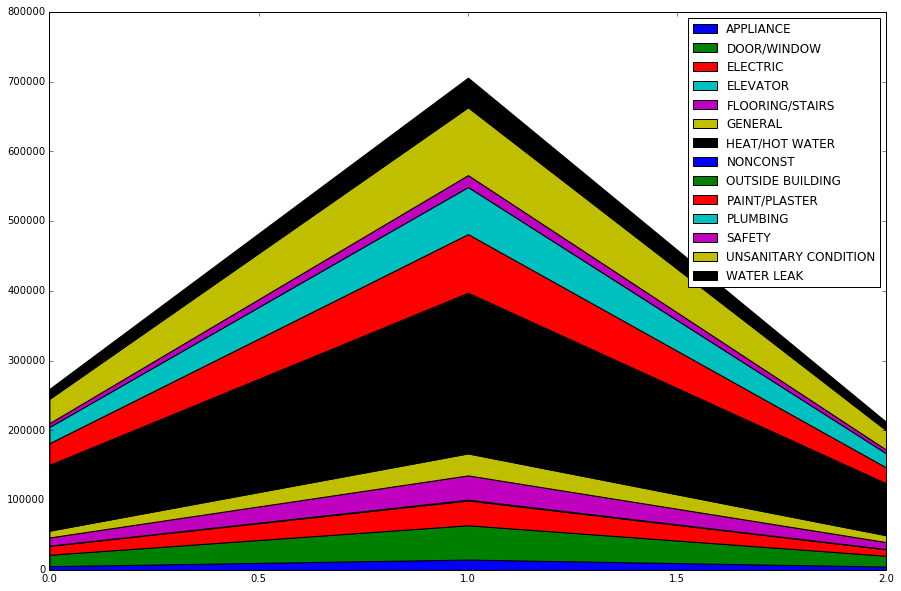

In [12]:
x = np.arange(len(years))
y = np.column_stack((plotdict['2014'],plotdict['2015'],plotdict['2016']))
plt.figure(figsize = (15,10));
plt.stackplot(x,y);
plt.legend(labels)

This might legit be the ugliest plot I have ever seen. Let's try and fix the colors first.

From [this](http://godsnotwheregodsnot.blogspot.ru/2012/09/color-distribution-methodology.html) blog post, I got a list of 14 contrasting colors.

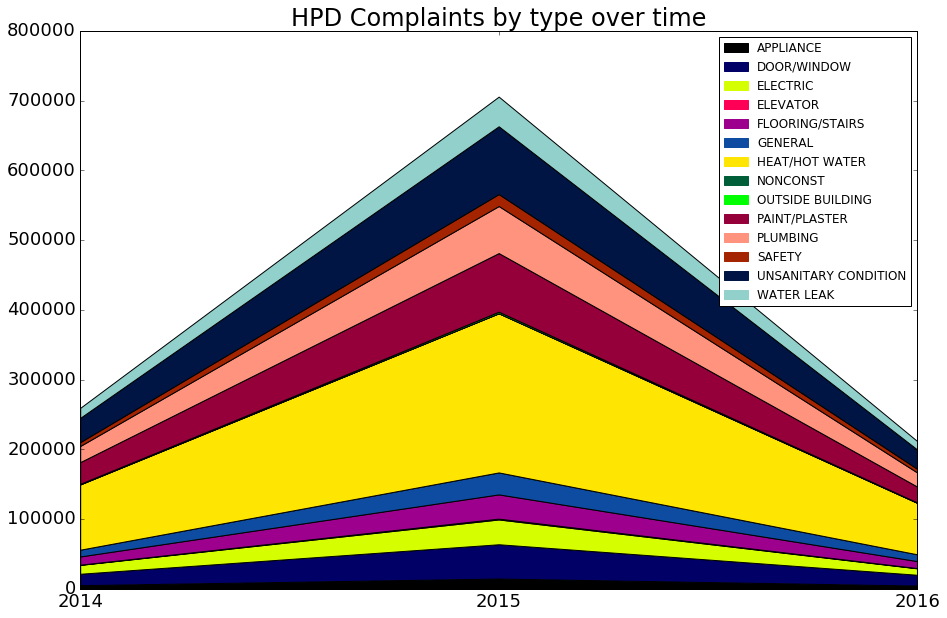

In [13]:
from matplotlib import patches as mpatches

plotcolors = [(0,0,0),(1,0,103),(213,255,0),(255,0,86),(158,0,142),(14,76,161),(255,229,2),(0,95,57),\
            (0,255,0),(149,0,58),(255,147,126),(164,36,0),(0,21,68),(145,208,203),(98,14,0)]

#rescaling rgb from 0-255 to 0 to 1
plotcolors = [(x[0]/float(255),x[1]/float(255),x[2]/float(255)) for x in plotcolors]
legendcolors = [mpatches.Patch(color = x) for x in plotcolors]

x = np.arange(len(years))
y = np.column_stack((plotdict['2014'],plotdict['2015'],plotdict['2016']))
plt.figure(figsize = (15,10));
plt.stackplot(x,y,colors = plotcolors);
plt.legend(legendcolors, labels);

#some labels for the x axis
xlabels = ['2014', '2015', '2016']
plt.xticks(x,xlabels, size = 18);
plt.yticks(size = 18);
plt.title('HPD Complaints by type over time', size = 24);

Okay, so this looks a little better, and with some tweaking, we can make this work.